In [1]:
# Import library
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-bright')

In [2]:
# Read data
from google.colab import drive
drive.mount("/content/drive/")
%cd '/content/drive/My Drive/DS340/dataset'
!pwd

rating = pd.read_csv('ratings.csv')
movie_names = pd.read_csv('movies.csv') 

rating

Mounted at /content/drive/
/content/drive/My Drive/DS340/dataset
/content/drive/My Drive/DS340/dataset


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434


In [3]:
movie_names

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
62418,209157,We (2018),Drama
62419,209159,Window of the Soul (2001),Documentary
62420,209163,Bad Poems (2018),Comedy|Drama
62421,209169,A Girl Thing (2001),(no genres listed)


In [4]:
movie_data = pd.merge(rating, movie_names, on='movieId')
movie_data

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1147880044,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1439474476,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1573938898,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,830786155,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,835444730,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
25000090,162358,200192,2.0,1553453039,Den frusna leoparden (1986),(no genres listed)
25000091,162358,200194,2.0,1553453843,Tough Luck (2004),Action|Adventure|Thriller
25000092,162386,139970,3.5,1549215965,I Don't Speak English (1995),Comedy
25000093,162386,200726,4.0,1554651417,The Graduates (1995),Children|Drama


In [5]:
Trend=pd.DataFrame(movie_data.groupby ('title') ['rating'].mean ())
Trend ['total number of ratings'] = pd.DataFrame(movie_data.groupby ('title') ['rating'].count ())
Trend

,rating,total number of ratings
title,,
"""BLOW THE NIGHT!"" Let's Spend the Night Together (1983)",3.000000,1
"""Great Performances"" Cats (1998)",2.896648,179
#1 Cheerleader Camp (2010),2.111111,9
#Captured (2017),3.750000,2
#Female Pleasure (2018),3.666667,3
...,...,...
…And the Fifth Horseman Is Fear (1965),3.250000,2
キサラギ (2007),3.250000,2
チェブラーシカ (2010),3.166667,9


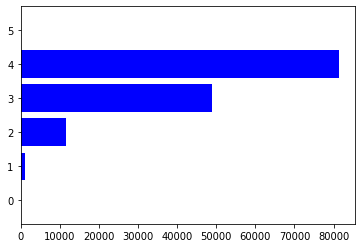

In [6]:
plt.Figure(figsize = (10, 4))
As=plt.barh (Trend['rating'].round(), Trend['total number of ratings'],color ='b')
plt.show ()

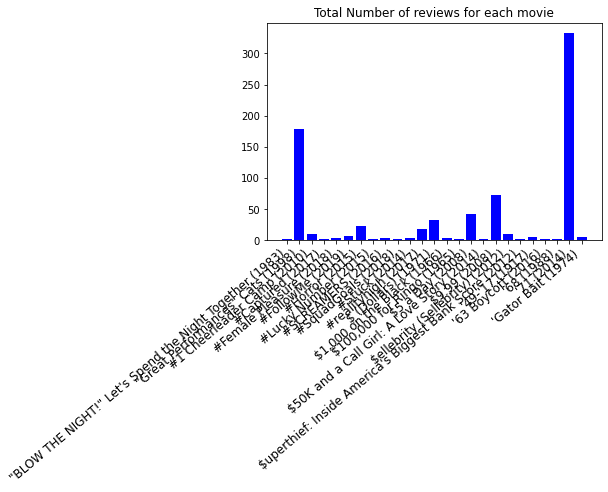

In [7]:
plt.Figure(figsize=(10,4))
As=plt.subplot()
As.bar(Trend.head(25).index, Trend['total number of ratings'].head(25), color='b')
As.set_xticklabels(Trend.index, rotation=40, fontsize='12',horizontalalignment="right")
As.set_title ("Total Number of reviews for each movie")
plt.show () 

In [8]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(50)

title
Full of Grace (2015)                         5.0
Geordie (1955)                               5.0
Garfield In Paradise (1986)                  5.0
Lost Woods (2012)                            5.0
Garfield in the Rough (1984)                 5.0
Lost Time (2014)                             5.0
Who Killed Chea Vichea? (2010)               5.0
Lost Rivers (2013)                           5.0
Who Killed Johnny (2013)                     5.0
Generation Baby Buster (2011)                5.0
Genesis                                      5.0
Loss Prevention (2015)                       5.0
Genius on Hold (2013)                        5.0
Solitary (2016)                              5.0
Spreading Darkness (2017)                    5.0
Sole Proprietor (2016)                       5.0
After the Sun Fell (2017)                    5.0
Solanin (2010)                               5.0
Ghost (2010)                                 5.0
Ghostline (2015)                             5.0
Snow White (19

In [9]:
Trend.sort_values(by = 'total number of ratings', ascending=False)

,rating,total number of ratings
title,,
Forrest Gump (1994),4.048011,81491
"Shawshank Redemption, The (1994)",4.413576,81482
Pulp Fiction (1994),4.188912,79672
"Silence of the Lambs, The (1991)",4.151342,74127
"Matrix, The (1999)",4.154099,72674
...,...,...
Kojot (2017),4.000000,1
Kochavva Paulo Ayyappa Coelho (2016),3.000000,1
Knuckleface Jones (1999),0.500000,1


# Novel work - Heejun & So-I

No. Without_Few_Ratings =  10290


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dc73128d0>,
      dtype=object)

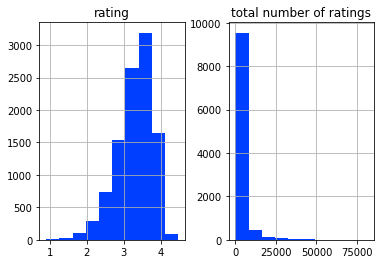

In [10]:
# Extract data that have enough total number of ratings
# Remove movies with too few number of ratings
Without_Few_Ratings = Trend[Trend['total number of ratings'] > 100]
print("No. Without_Few_Ratings = ", Without_Few_Ratings['total number of ratings'].count())
Without_Few_Ratings.hist()
#Few_Ratings.sort_values(by = 'total number of ratings', ascending=True)

In [11]:
Reliable = Without_Few_Ratings.sort_values(by = 'rating', ascending=False)
Reliable

,rating,total number of ratings
title,,
Planet Earth II (2016),4.483096,1124
Planet Earth (2006),4.464797,1747
"Shawshank Redemption, The (1994)",4.413576,81482
Band of Brothers (2001),4.398599,1356
Cosmos,4.326715,277
...,...,...
Disaster Movie (2008),1.205566,557
Barney's Great Adventure (1998),1.195214,397
Glitter (2001),1.125561,669


In [12]:
Reliable_with_Genre = pd.merge(Reliable, movie_names, how='inner', on='title')
Reliable_with_Genre

,title,rating,total number of ratings,movieId,genres
0,Planet Earth II (2016),4.483096,1124,171011,Documentary
1,Planet Earth (2006),4.464797,1747,159817,Documentary
2,"Shawshank Redemption, The (1994)",4.413576,81482,318,Crime|Drama
3,Band of Brothers (2001),4.398599,1356,170705,Action|Drama|War
4,Cosmos,4.326715,277,171495,(no genres listed)
...,...,...,...,...,...
10314,Disaster Movie (2008),1.205566,557,61348,Comedy
10315,Barney's Great Adventure (1998),1.195214,397,1826,Adventure|Children
10316,Glitter (2001),1.125561,669,4775,Drama|Musical|Romance
10317,From Justin to Kelly (2003),1.027578,417,6483,Musical|Romance


# Reliable_with_Genre : 10319 rows

# Reliable : 10290 rows

Need to find 29 redundant values

In [13]:
Reliable_with_Genre.nunique()

title                      10290
rating                      9894
total number of ratings     3718
movieId                    10319
genres                       935
dtype: int64

In [14]:
a = Reliable_with_Genre.groupby ('title').count ()
a.sort_values(by = 'rating', ascending=False)

,rating,total number of ratings,movieId,genres
title,,,,
The Boss (2016),2,2,2,2
Sing (2016),2,2,2,2
Men with Guns (1997),2,2,2,2
Macbeth (2015),2,2,2,2
The Forest (2016),2,2,2,2
...,...,...,...,...
G.I. Jane (1997),1,1,1,1
G.I. Joe: Retaliation (2013),1,1,1,1
G.I. Joe: The Rise of Cobra (2009),1,1,1,1


In [31]:
two = a[a['rating'] == 2]
two

,rating,total number of ratings,movieId,genres
title,,,,
9 (2009),2,2,2,2
Aladdin (1992),2,2,2,2
Cargo (2017),2,2,2,2
Casanova (2005),2,2,2,2
Chaos (2005),2,2,2,2
Clear History (2013),2,2,2,2
Clockstoppers (2002),2,2,2,2
Cold War (2018),2,2,2,2
Confessions of a Dangerous Mind (2002),2,2,2,2


In [37]:
two.index

Index(['9 (2009)', 'Aladdin (1992)', 'Cargo (2017)', 'Casanova (2005)',
       'Chaos (2005)', 'Clear History (2013)', 'Clockstoppers (2002)',
       'Cold War (2018)', 'Confessions of a Dangerous Mind (2002)',
       'Dracula (1931)', 'Enron: The Smartest Guys in the Room (2005)',
       'Frozen (2010)', 'Gossip (2000)', 'Hamlet (2000)', 'Hostage (2005)',
       'Journey to the Center of the Earth (2008)',
       'Lagaan: Once Upon a Time in India (2001)', 'Little Man (2006)',
       'Lucky (2017)', 'Macbeth (2015)', 'Men with Guns (1997)',
       'Saturn 3 (1980)', 'Sing (2016)', 'The Boss (2016)',
       'The Forest (2016)', 'The Void (2016)', 'Veronica (2017)',
       'War of the Worlds (2005)', 'Weekend (2011)'],
      dtype='object', name='title')

In [46]:
movies_with_two_movieID = ['9 (2009)', 'Aladdin (1992)', 'Cargo (2017)', 'Casanova (2005)',
       'Chaos (2005)', 'Clear History (2013)', 'Clockstoppers (2002)',
       'Cold War (2018)', 'Confessions of a Dangerous Mind (2002)',
       'Dracula (1931)', 'Enron: The Smartest Guys in the Room (2005)',
       'Frozen (2010)', 'Gossip (2000)', 'Hamlet (2000)', 'Hostage (2005)',
       'Journey to the Center of the Earth (2008)',
       'Lagaan: Once Upon a Time in India (2001)', 'Little Man (2006)',
       'Lucky (2017)', 'Macbeth (2015)', 'Men with Guns (1997)',
       'Saturn 3 (1980)', 'Sing (2016)', 'The Boss (2016)',
       'The Forest (2016)', 'The Void (2016)', 'Veronica (2017)',
       'War of the Worlds (2005)', 'Weekend (2011)']

for i in movies_with_two_movieID:
  k = Reliable_with_Genre[Reliable_with_Genre['title'] == i]
  Reliable_with_Genre.drop(k.index[1],inplace=True)

Reliable_with_Genre

,title,rating,total number of ratings,movieId,genres
0,Planet Earth II (2016),4.483096,1124,171011,Documentary
1,Planet Earth (2006),4.464797,1747,159817,Documentary
2,"Shawshank Redemption, The (1994)",4.413576,81482,318,Crime|Drama
3,Band of Brothers (2001),4.398599,1356,170705,Action|Drama|War
4,Cosmos,4.326715,277,171495,(no genres listed)
...,...,...,...,...,...
10314,Disaster Movie (2008),1.205566,557,61348,Comedy
10315,Barney's Great Adventure (1998),1.195214,397,1826,Adventure|Children
10316,Glitter (2001),1.125561,669,4775,Drama|Musical|Romance
10317,From Justin to Kelly (2003),1.027578,417,6483,Musical|Romance


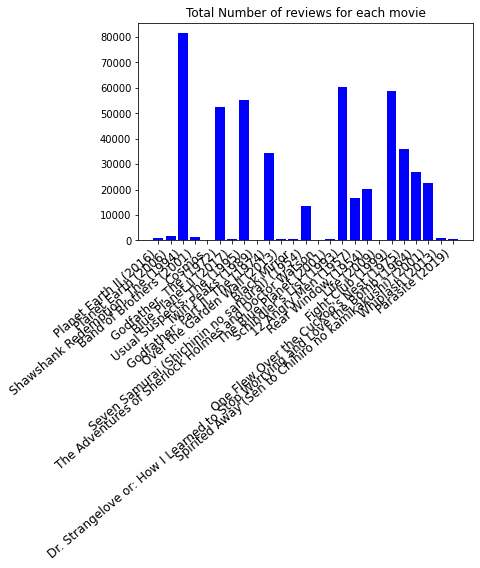

In [47]:
plt.Figure(figsize=(10,4))
Cs=plt.subplot()
Cs.bar(Reliable.head(25).index, Reliable['total number of ratings'].head(25), color='b')
Cs.set_xticklabels(Reliable.index, rotation=40, fontsize='12',horizontalalignment="right")
Cs.set_title ("Total Number of reviews for each movie")
plt.show () 